<a href="https://colab.research.google.com/github/husthorng/hello-world/blob/horng_1/backpropagation_4x3y_NQ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd



def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))





epstep=500

#numTag = int(input('Insert the number Neurons into Output Layer: '))
#epochs = int(input('Insert the number of Epochs: '))
#hidden_node = int(input('Insert the number Neurons into Hidden Layer: '))
#lr = float(input('Insert Learning Rate: '))
#limer = float(input('Insert Expected Error: '))
numTag=3
pernum=100
epochs=10000
hidden_node=6
lr=0.02
SSE_Goal=0.05


#ur2 = "https://raw.githubusercontent.com/husthorng/hello-world/horng_1/N_Q.csv"

ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y_NQ.csv"

In [17]:
SSE_Goal=0.02
lr=0.01

In [2]:
records = pd.read_csv(ur2,encoding='utf-8')
Xi1=records.iloc[0:records.shape[0]].values

max_min_Xi=np.array([list(np.max(Xi1,axis=0)),list(np.min(Xi1,axis=0))])
ptp_Xi=np.ptp(max_min_Xi,axis=0)
NXi=(Xi1 - np.min(Xi1,axis=0))/ptp_Xi
#NXi*ptp_Xi+max_min_Xi[1]

In [ ]:
NXi[0]

array([0.3       , 0.2       , 0.796875  , 0.1       , 0.83764724,
       0.82330265, 0.84185418])

array([0.3       , 0.2       , 0.796875  , 0.1       , 0.83764724,
       0.82330265, 0.84185418])


In [3]:
Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values
#targetD[0] #[ 47.39592, 943.3549 ]

In [ ]:
targetD[0]

array([ 47.39592   , 943.3549    ,  78.11000309])

In [4]:
W1=np.random.rand(hidden_node,inputD.shape[1]+1)*0.5
W2=np.random.rand(targetD.shape[1],hidden_node+1)*0.5
onex=np.ones(inputD.shape[0],dtype=int)


In [5]:
max_min_l=np.array([list(np.max(inputD,axis=0)),list(np.min(inputD,axis=0))])
#max_min_l=np.array([max_min_l[0]*1.1,max_min_l[1]*0.9])
#max_min_l

In [6]:
np.insert(inputD,0,max_min_l,axis=0)
inputD1=np.insert(inputD,0,max_min_l,axis=0)
ptp_inputD1=np.ptp(inputD1,axis=0)

In [7]:
inputD2=(inputD1 - np.min(inputD1,axis=0))/ptp_inputD1
#inputD2
inputD3=inputD2[2:,:]
#inputD3
inputD3_1=np.insert(inputD3, 0, 1, axis=1)
inputD3_1[0] #array([1.      , 0.3     , 0.2     , 0.796875, 0.1     ])


array([1.      , 0.3     , 0.2     , 0.796875, 0.1     ])

In [ ]:
inputD3_1[0]

array([1.      , 0.3     , 0.2     , 0.796875, 0.1     ])

In [8]:
max_min_T=np.array([list(np.max(targetD,axis=0)),list(np.min(targetD,axis=0))])
#max_min_T=np.array([max_min_T[0]*1.1,max_min_T[1]*0.9])
#print(max_min_T)
targetD1=np.insert(targetD,0,max_min_T,axis=0)

ptp_targetD1=np.ptp(targetD1,axis=0)
targetD2=(targetD1 - np.min(targetD1,axis=0))/ptp_targetD1
targetD3=targetD2[2:,:] #targetD3[0] array([0.69958759, 0.67419037, 0.68274371])

In [ ]:
targetD3[0]

array([0.69958759, 0.67419037, 0.68274371])

In [ ]:
ersum=100
ix=1
losses=[]
index_N=[]
# SSE_Goal=10
while ersum > SSE_Goal:
  net_h=inputD3_1@W1.T
  out_h=sigmoid(net_h,deriv=False)
  out_H1=np.insert(out_h, 0, 1, axis=1)
  net_o=out_H1@W2.T
  out_o=sigmoid(net_o,deriv=False)
  er=targetD3-out_o
  ersum=np.sum(er**2)
  if ix%pernum==0:
    losses.append(ersum)
    index_N.append(ix)
    print("run:",ix,"sumer=",ersum)
  ix+=1
  delta_o=out_o*(1-out_o)*er #delta_o= (300, 2)
  ckdao=delta_o.T@out_H1
  delta_W2=lr*delta_o.T@out_H1
  W2 = W2+delta_W2
  data2=out_h*(1-out_h)
  data1=(delta_o@W2[:,1:])*data2
  delw1=lr*((inputD3_1.T@data1).T)
  W1=W1+delw1

out_o_V=out_o*ptp_targetD1+max_min_T[1]
df = pd.DataFrame(out_o_V)
df.to_csv("out_o_V.csv")

if ersum < SSE_Goal :
    print("ersum < SSE_Goal ")
#    break
else:
    print("ersum > SSE_Goal")

In [20]:
df = pd.DataFrame(W2)
df.to_csv("W2.csv")

In [ ]:
hidden_node=6; lr=0.02; SSE_Goal=0.01

In [68]:
W2


array([[-4.60751764,  5.84133346, -6.24265806,  1.88551713,  6.03027456,
         3.26714022, -1.38506427],
       [-0.89547996,  4.2356173 ,  1.42679986, -4.64867596,  4.65397698,
        -4.08963171,  2.31031569],
       [-3.86764858,  5.65803472, -4.35948039,  0.25399035,  6.05149628,
         1.47454173, -0.75516271]])

hidden_node=6;
lr=0.02;
SSE_Goal=0.01

W1=np.array([[ 3.8087994 , -2.16577573,  0.99393978,  7.59593542, -2.56389625],
       [ 0.7758146 ,  1.12707915, -0.4574657 , -2.73057357,  0.92642669],
       [ 1.29434415,  0.04743469, -0.03967344, -3.22566296,  1.0070643 ],
       [-8.73586089, -2.38258362,  1.12050653,  8.79434714, -2.97486033],
       [-1.20212325,  1.62472112, -0.65584855,  0.40974   ,  0.04435674],
       [-2.85840511, -3.7645363 ,  1.46825877,  1.25967093, -0.73904051]])

W2=np.array([[-4.60751764,  5.84133346, -6.24265806,  1.88551713,  6.03027456,
         3.26714022, -1.38506427],
       [-0.89547996,  4.2356173 ,  1.42679986, -4.64867596,  4.65397698,
        -4.08963171,  2.31031569],
       [-3.86764858,  5.65803472, -4.35948039,  0.25399035,  6.05149628,
         1.47454173, -0.75516271]])

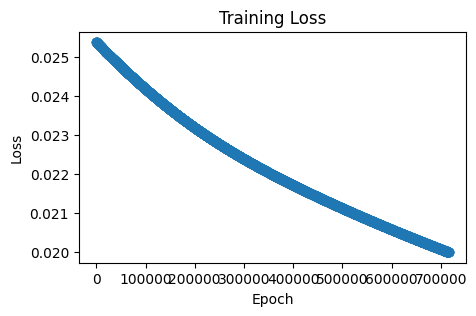

In [69]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(index_N, losses)
#plt.scatter(index_N, losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [26]:
[max_min_T[:,0][1],max_min_T[:,0][0],max_min_T[:,0][1],max_min_T[:,0][0]]

[31.78824, 50.421, 31.78824, 50.421]

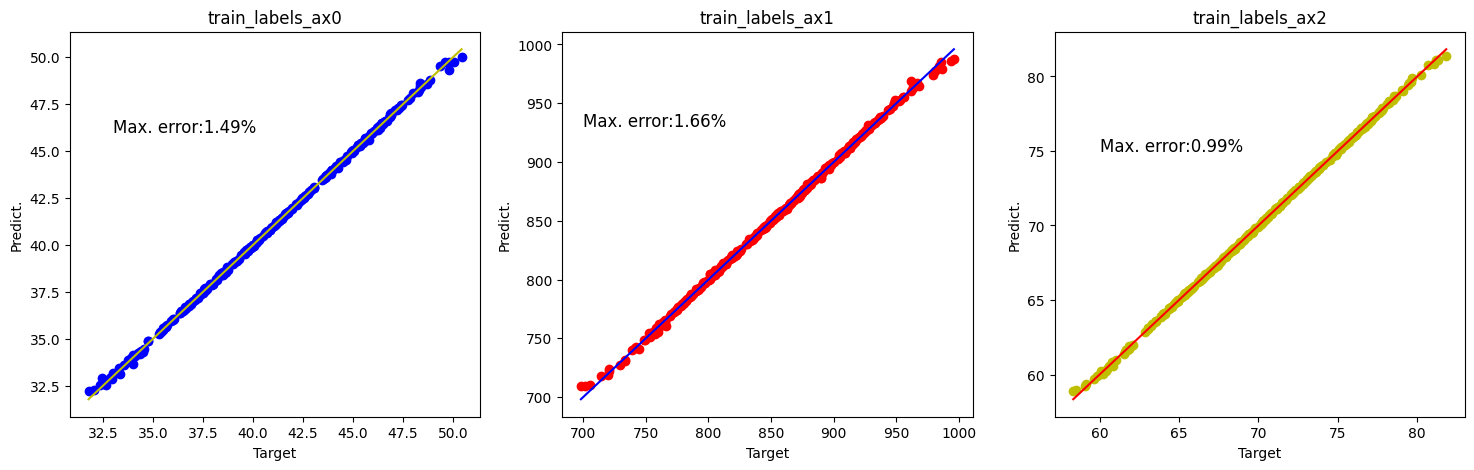

In [70]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

import pandas as pd

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(targetD[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(33, 46,'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "b")
ax1.scatter(targetD[:,1], out_o_V[:,1],color = "r")
ax1.set_title('train_labels_ax1')
ax1.text(700, 930,'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,1])*100,2))+'%', fontsize=12)

ax2 = fig.add_subplot(spec[2])
ax2.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "r")
ax2.scatter(targetD[:,2], out_o_V[:,2],color = "y")
ax2.set_title('train_labels_ax2')
ax2.text(60, 75,'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,2])*100,2))+'%', fontsize=12)
#plt.title('')

ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()


In [58]:
str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))

'1.49'

In [ ]:
import numpy as np
import csv
import pandas as pd
urlsyn0 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/4X3ysyn0.csv"
urlsyn1 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/4X3ysyn1.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
syn0=syn0t[1:,1:]
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
syn1=syn1t[1:,1:]
nOutputs=syn1.shape[1]

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))



In [ ]:
import numpy as np
import csv
import pandas as pd
url = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y.csv"
records = pd.read_csv(url,encoding='utf-8',header=None)
Xi=records.iloc[0:records.shape[0],0:records.shape[1]-nOutputs].values
y=records.iloc[:,list(records.shape[1]-np.arange(nOutputs,0,-1))].values
X=np.insert(Xi,Xi[0].size,1,axis=1)
from sklearn.model_selection import train_test_split
res = train_test_split(X, y,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data, test_data, train_labels, test_labels = res


In [ ]:
l0 = test_data
l1 = sigmoid(np.dot(l0,syn0))
l1=np.insert(l1,l1[0].size,1,axis=1)
l2 = sigmoid(np.dot(l1,syn1))
for i in range(l2.shape[0]):
  for j in range(l2.shape[1]):
    if l2[i][j] > 0.5:
      l2[i][j]=1
    else:
      l2[i][j]=0

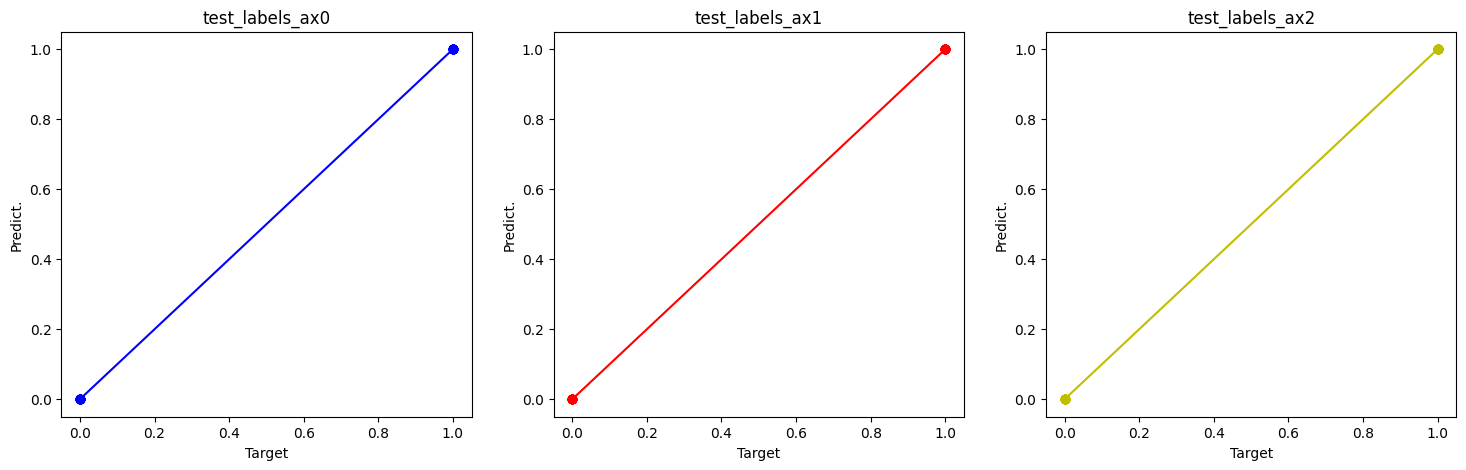

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import gridspec
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([0, 1],color = "b")
ax0.scatter(test_labels[:,0], l2[:,0],color = "b")
ax0.set_title('test_labels_ax0')

ax1 = fig.add_subplot(spec[1])
ax1.plot([0, 1],color = "r")
ax1.scatter(test_labels[:,1], l2[:,1],color = "r")
ax1.set_title('test_labels_ax1')

ax2 = fig.add_subplot(spec[2])
ax2.plot([0, 1],color = "y")
ax2.scatter(test_labels[:,2], l2[:,2],color = "y")
ax2.set_title('test_labels_ax2')


ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(inputD3_1, targetD3,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data, test_data, train_labels, test_labels = res